<a href="https://colab.research.google.com/github/rohit8077/Machine-learning-/blob/main/retail_store_based_on_their_purchase_history.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [11]:
df = pd.read_csv('/content/Mall_Customers.csv')

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [12]:
df = df.dropna()
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


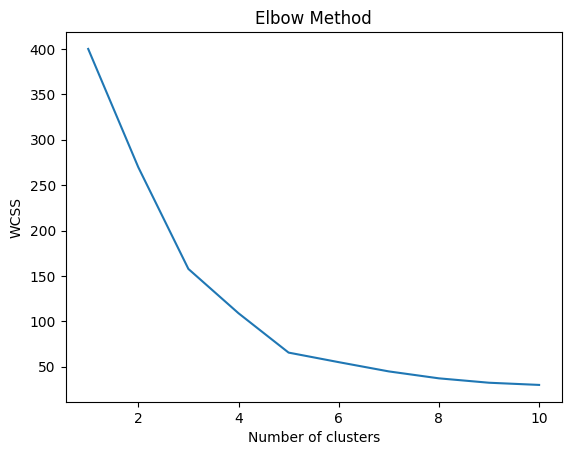

In [13]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [14]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(scaled_features)

df['Cluster'] = kmeans.labels_

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,2
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


In [15]:
cluster_analysis = df.groupby('Cluster').agg({'CustomerID': 'mean', 'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})
print(cluster_analysis)


         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0             162.0  40.394737           87.000000               18.631579
1             162.0  32.692308           86.538462               82.128205
2              62.0  40.325203           44.154472               49.829268


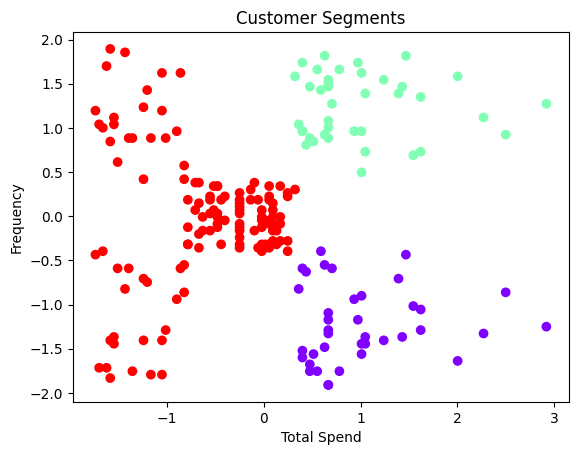

In [16]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=kmeans.labels_, cmap='rainbow')
plt.title('Customer Segments')
plt.xlabel('Total Spend')
plt.ylabel('Frequency')
plt.show()
